<div style="text-align: center;">
    <h1>Recipe Popularity Prediction</h1/>
</div>


<div style="text-align: center;">
    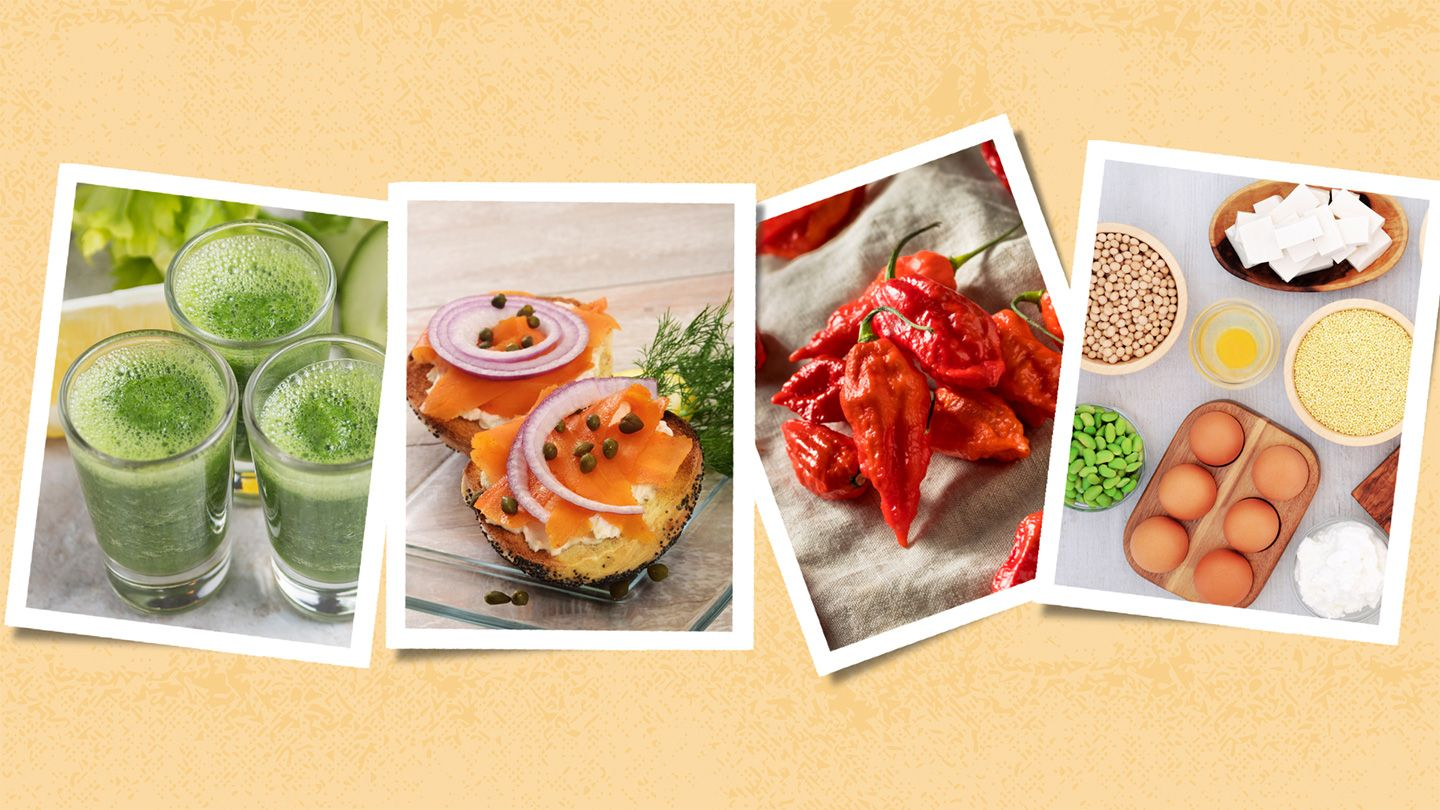
</div

)

**Name:** SHANI S J  
**Organization:** Entri Elevate  
**Date:** 30-01-2025 
 


### **1. Overview of Problem Statement**
This project aims to predict whether a recipe will be popular or not based on user engagement metrics such as thumbs_up, reply_count, and other relevant features. By analyzing user interactions, we aim to identify key factors influencing recipe popularity, enabling actionable insights to improve recipe success.

### **2. Objective**  
To build a machine learning model that classifies recipes into three categories—low, medium, and high popularity—based on user engagement metrics such as thumbs_up, reply_count, and other relevant features. The model aims to identify patterns in user interactions and provide insights into the factors contributing to recipe popularity.

### **3. Data Description**
- **Source**
-               https://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset
- **Features:**
  - `recipe_number`: Unique identifier for recipes.
  - `recipe_code`: Coded identifier for recipes.
  - `recipe_name`: Name of the recipe.
  - `comment_id`: Identifier for comments.
  - `user_id`: Identifier for users.
  - `user_name`: Name of the user.
  - `user_reputation`: Reputation score of the user.
  - `created_at`: Timestamp of recipe creation or comment.
  - `reply_count`: Number of replies to the recipe or comment.
  - `thumbs_up`: Number of positive feedbacks received.
  - `thumbs_down`: Number of negative feedbacks received.
  - `stars`: Rating given to the recipe.
  - `best_score`: Overall score or ranking of the recipe.
  - `text`: Comment or description associated with the recipe
- **Target Variable:** Stars
- **Number of Instances:** 18182 rows
- **Number of Features:** 15 features.


### **Importing Libraries**

In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [101]:
import warnings
warnings.filterwarnings("ignore")

In [261]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

In [103]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import Perceptron

### **4. Data Collection**
The dataset is imported from UCI Machine Learning Repository and includes features such as engagement metrics, user attributes, and recipe details.  
- **Goal**: Gain insights into the data distribution, relationships between features, and potential patterns that could influence recipe popularity.
- Perform exploratory data analysis (EDA) to identify trends, handle missing values, and understand class distributions for the target variable (`low`, `medium`, `high`).


***Load the data***

In [104]:
Data=pd.read_csv("Recipe Reviews and User Feedback Dataset.csv")
df=pd.DataFrame(Data)

***Data Exploration***

In [105]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [107]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (18182, 15)


In [108]:
print('The Summary Statistics of the dataset:')
df.describe()

The Summary Statistics of the dataset:


,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [109]:
print("Column names:")
df.columns

Column names:


Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text'],
      dtype='object')

### **5 Data Preprocessing - Data Cleaning:**

***Handle missing values and duplicates***

In [110]:
df.isnull().sum()

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

In [111]:
print(f"The number of missing values: {df.isnull().sum().sum()}")

The number of missing values: 2


In [112]:
print(f"Number of duplicate values:{df.duplicated().sum()}")

Number of duplicate values:0


**Data Quality Checks**

- **Missing Values**: Checked and confirmed. Two values were missing in the `text` column. Since the column is not significant, it is not being considered.  
- **Duplicate Values**: Checked and confirmed. No duplicate records were found in the dataset.


In [113]:
num_columns=df.select_dtypes(include="number").columns
print(f"The numerical columns are:{num_columns}")

The numerical columns are:Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'user_reputation',
       'created_at', 'reply_count', 'thumbs_up', 'thumbs_down', 'stars',
       'best_score'],
      dtype='object')


In [114]:
print(df['stars'].value_counts())

stars
5    13829
0     1696
4     1655
3      490
1      280
2      232
Name: count, dtype: int64


**Target Variable Creation**

1. **Categorizing `stars`**: The `stars` column is transformed into a categorical variable `stars_category` with three classes—`low`, `medium`, and `high`. This is done using the `pd.cut()` function with specified thresholds (`bins=[0, 2, 4, 5.1]`) and labels.

2. **Class Distribution Check**: The distribution of the `stars_category` is analyzed using `value_counts()` to ensure proper categorization and to identify potential class imbalances.


In [115]:
bins = [0, 2, 4, 5.1]  
labels = ['low', 'medium', 'high']

In [116]:
df['stars_category'] = pd.cut(df['stars'], bins=bins, labels=labels, right=False)
# Check class distribution
print("Class Distribution:")
print(df['stars_category'].value_counts())

Class Distribution:
stars_category
high      15484
low        1976
medium      722
Name: count, dtype: int64



- Since the data is imbalanced, we need to apply **SMOTE (Synthetic Minority Oversampling Technique)** after splitting the data to address the imbalance and ensure better model performance.


***Check for and remove outliers using statistical methods***


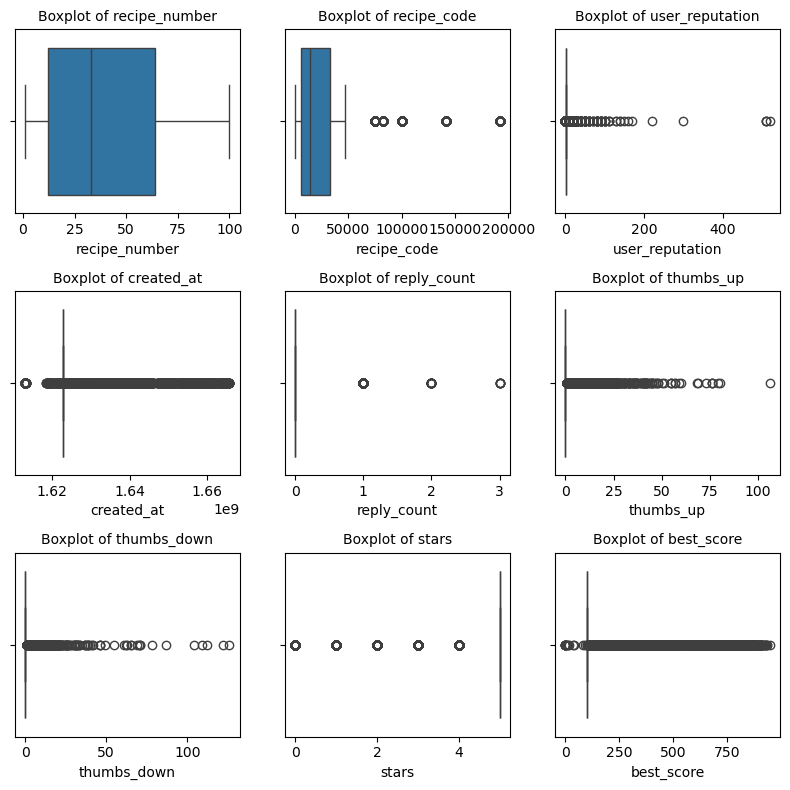

In [117]:
num_columns=['recipe_number', 'recipe_code', 'user_reputation','created_at', 'reply_count', 
             'thumbs_up', 'thumbs_down', 'stars','best_score']
plt.figure(figsize=(8,8))
for i, col in enumerate(num_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df,x=col)
    plt.title(f'Boxplot of {col}',fontsize = 10)
plt.tight_layout()
plt.show()

In [118]:
skewness = df[num_columns].skew()
print("Skewness:")
skewness

Skewness:


recipe_number       0.458893
recipe_code         3.443731
user_reputation    33.718475
created_at          5.449677
reply_count        11.283080
thumbs_up           8.414118
thumbs_down        17.890266
stars              -2.128602
best_score          3.402575
dtype: float64

**Note on Target Variable**
Since `stars` is the target variable and it ranges from 0 to 5, there is no need to correct its skewness. The target variable should reflect the natural distribution of the data to ensure accurate predictions.


### **Address skewed data in numerical features through transformations**
***Winsorization***

Winsorization is applied to cap extreme outliers in the dataset, which can significantly distort the distribution of features. By limiting values at the lower and upper percentiles (e.g., 5% and 95%), we reduce the influence of extreme values while retaining all data points. This step helps in improving model performance and ensures that skewed features do not dominate the learning process.


In [119]:
def winsorize_column(column, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = column.quantile(lower_percentile)
    upper_limit = column.quantile(upper_percentile)
    return np.clip(column, lower_limit, upper_limit)

columns_to_winsorize = ['recipe_code', 'user_reputation', 'created_at', 'reply_count', 'thumbs_up', 'thumbs_down', 'best_score']

for col in columns_to_winsorize:
    df[col] = winsorize_column(df[col])

In [120]:
skewness = df[num_columns].skew()
print("Skewness:")
skewness

Skewness:


recipe_number      0.458893
recipe_code        0.411183
user_reputation    3.697419
created_at        -0.029669
reply_count        0.000000
thumbs_up          2.670241
thumbs_down        2.640227
stars             -2.128602
best_score         2.490441
dtype: float64

***BOXPLOT after handling skewness***

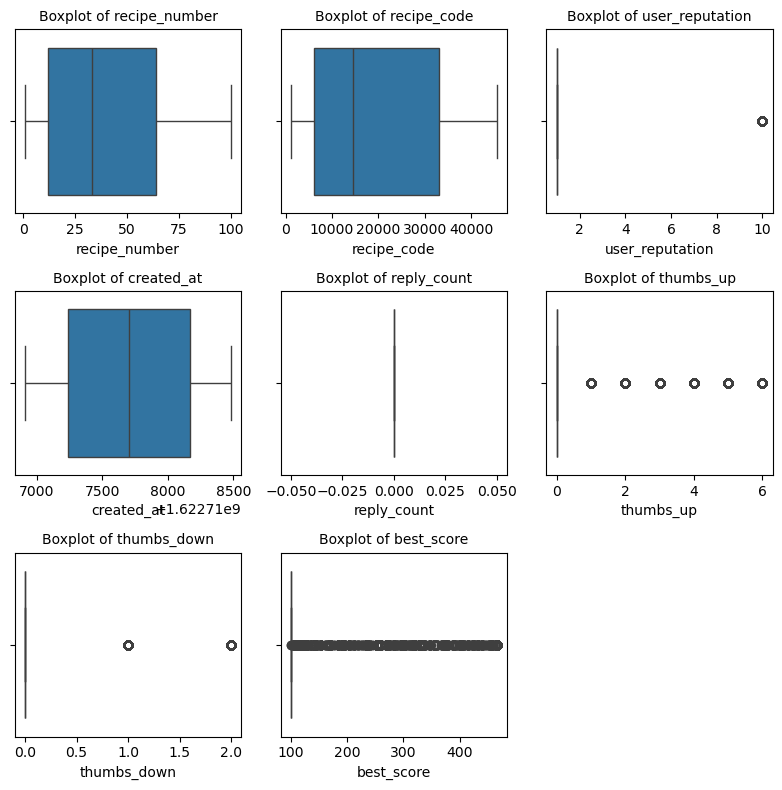

In [121]:
num_columns=['recipe_number', 'recipe_code', 'user_reputation','created_at', 'reply_count', 
             'thumbs_up', 'thumbs_down','best_score']
plt.figure(figsize=(8,8))
for i, col in enumerate(num_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df,x=col)
    plt.title(f'Boxplot of {col}',fontsize = 10)
plt.tight_layout()
plt.show()

### ***6. Exploratory Data Analysis (EDA)***

***HISTOGRAMS***  
Histograms show the distribution of numerical data, helping you understand the frequency of each value or range of values.

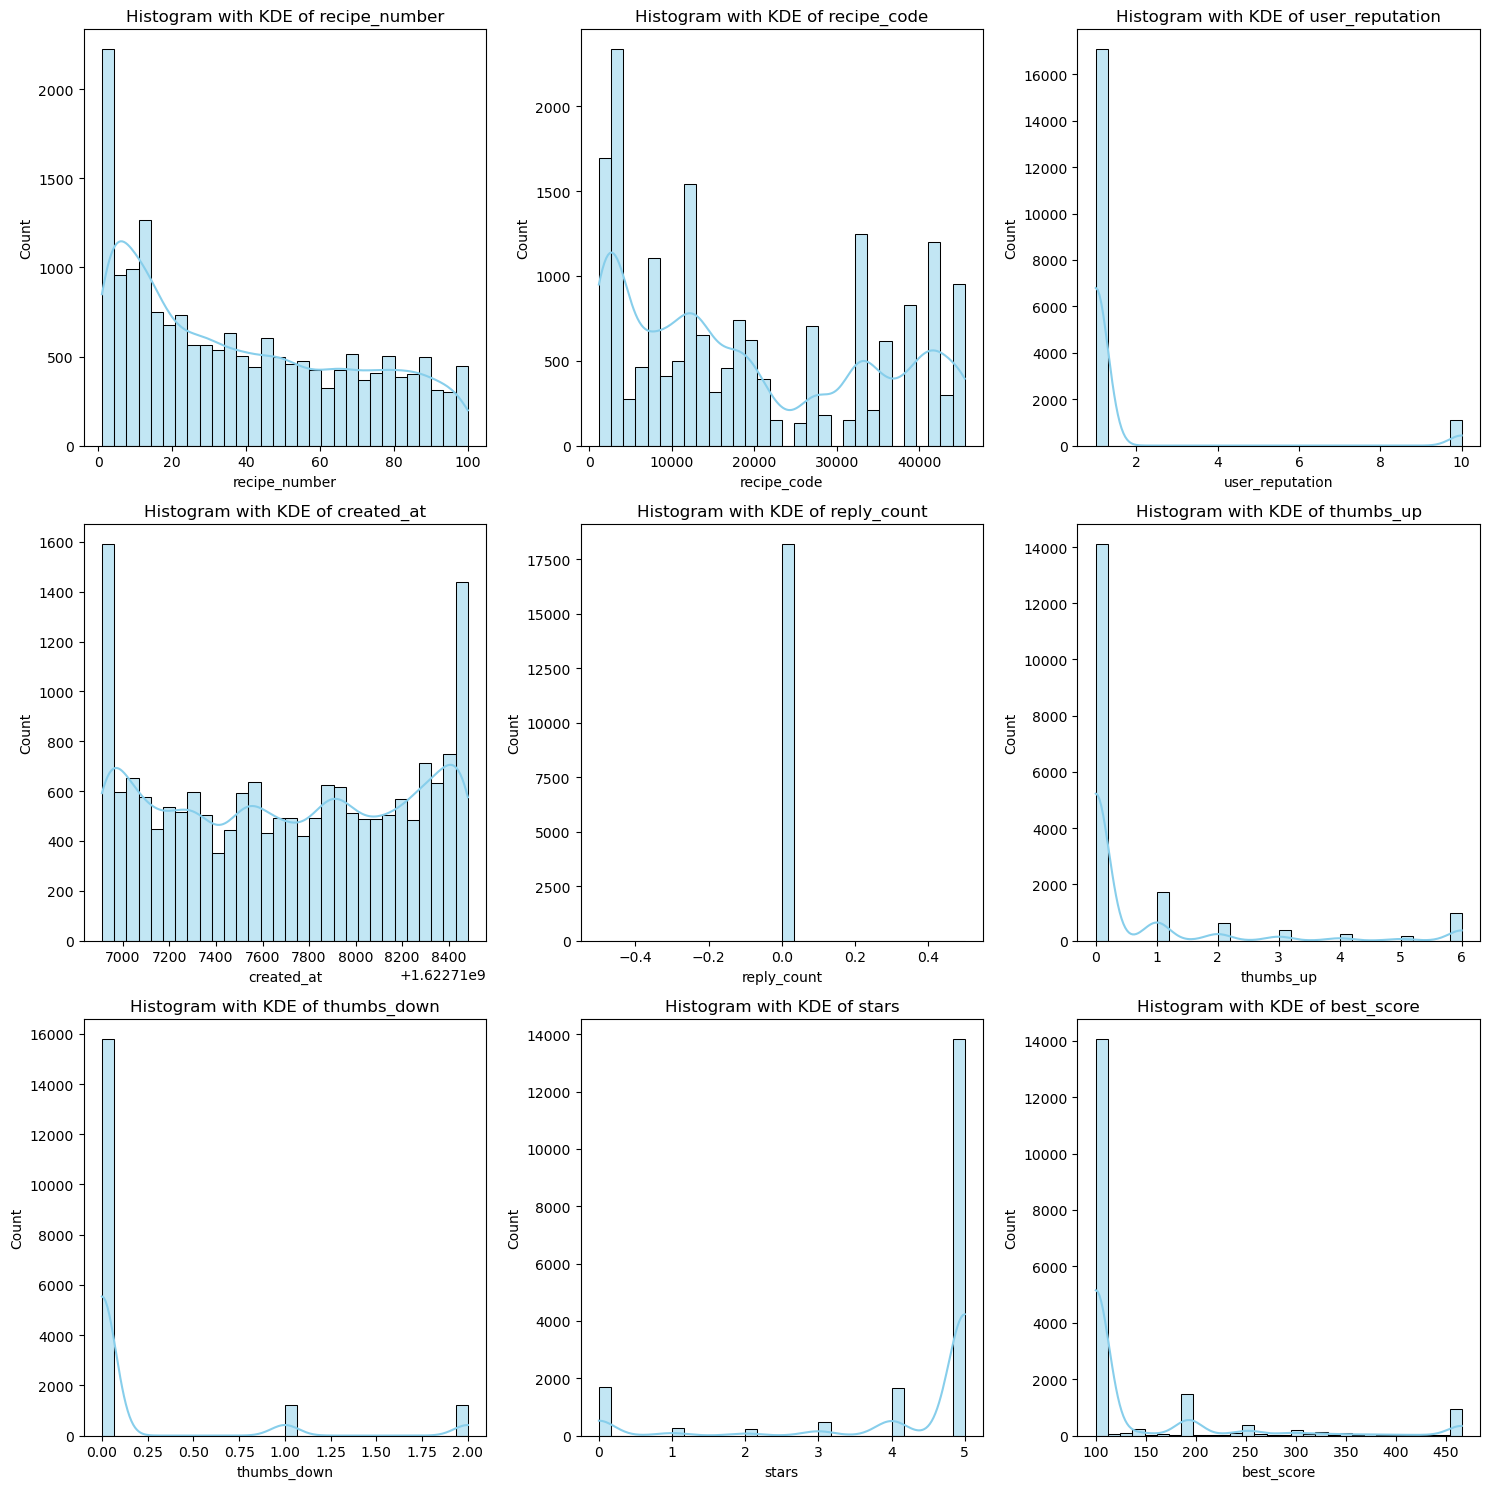

In [123]:
num_columns = ['recipe_number', 'recipe_code', 'user_reputation', 'created_at', 
               'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score']

plt.figure(figsize=(15, 15))  
for i, col in enumerate(num_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)  
    plt.title(f"Histogram with KDE of {col}")

plt.tight_layout()
plt.show()

***PAIR PLOT***  
A pair plot visualizes pairwise relationships across all numeric variables and helps identify correlations

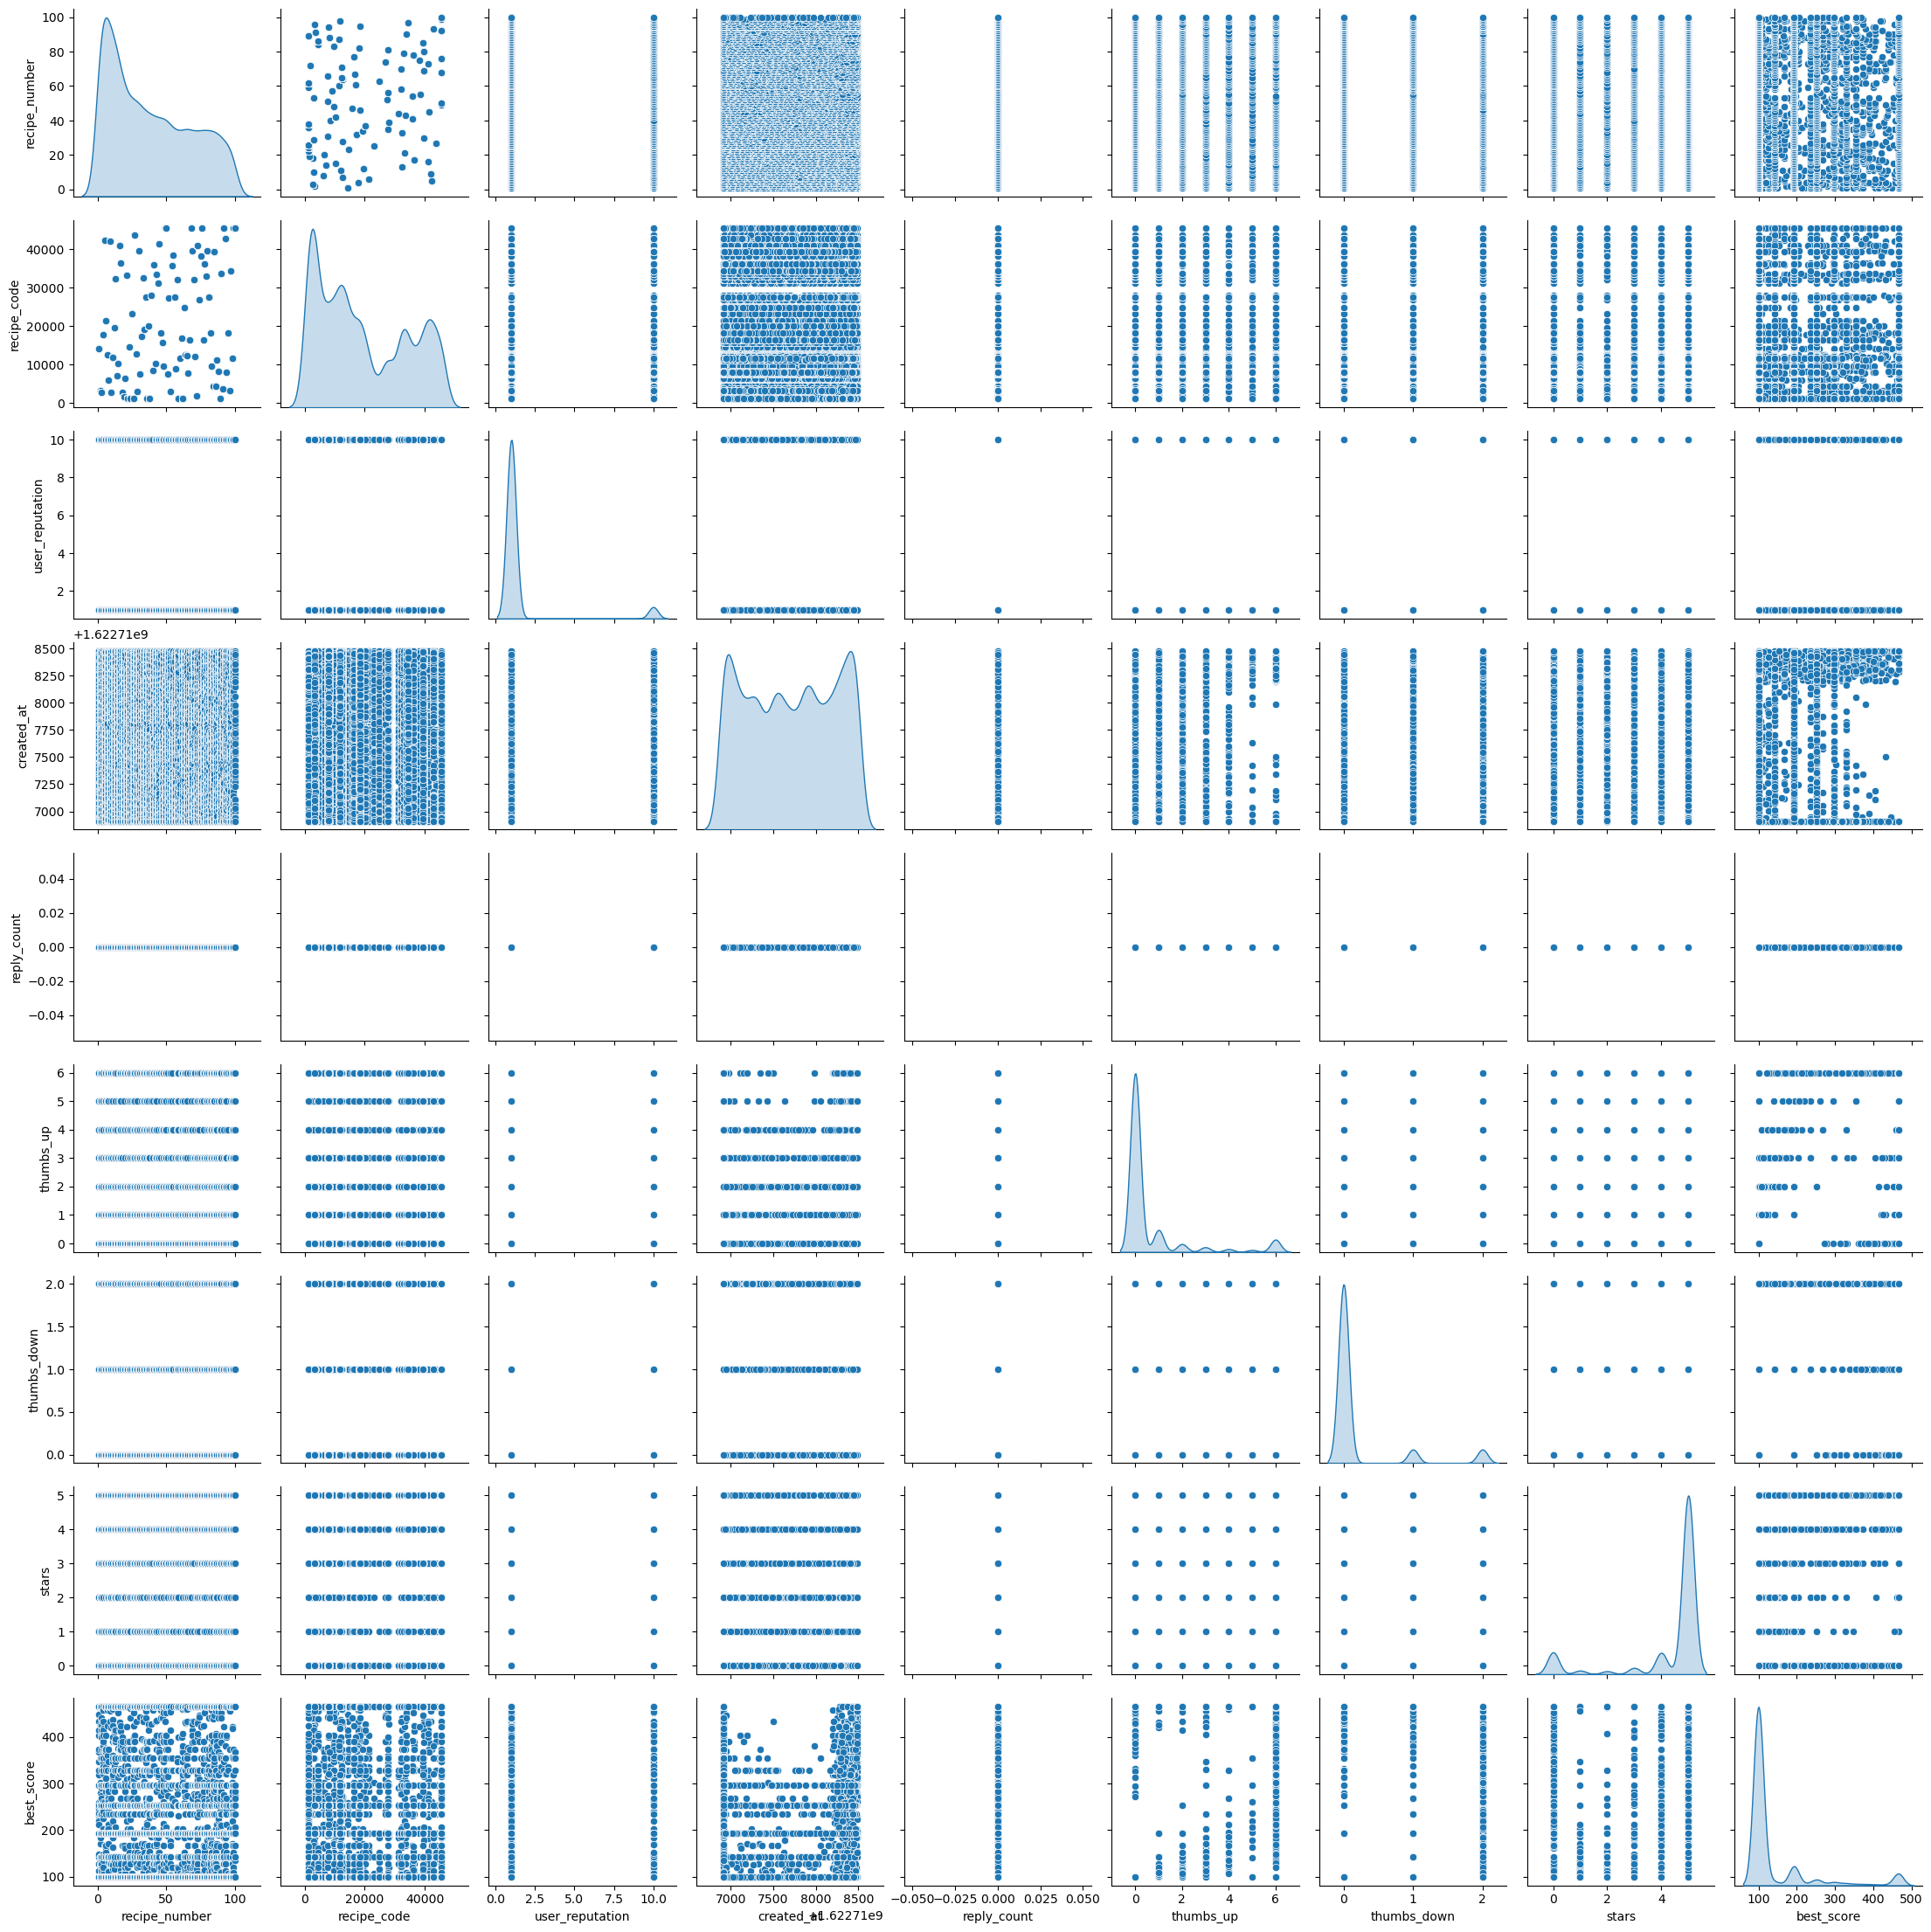

In [124]:
sns.pairplot(df[num_columns], diag_kind='kde', markers='o')
plt.show()

***HEATMAP CORRELATION***  
A heatmap visualizes the correlation matrix of numerical columns, showing relationships between variables.

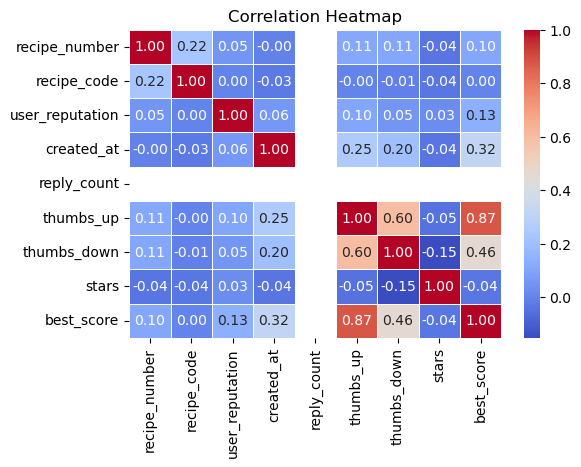

In [125]:
correlation_matrix = df[num_columns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

***PIE DIAGRAM***  
A pie chart visualizes the proportion of categorical data. It’s useful for showing the distribution of categories.

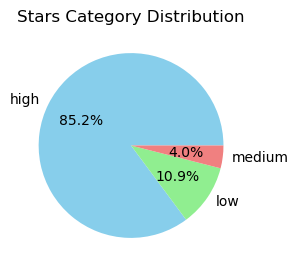

In [126]:
stars_dist = df['stars_category'].value_counts()
plt.figure(figsize=(3,3))
stars_dist.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Stars Category Distribution')
plt.ylabel('')
plt.show()

***BAR PLOT***  
Bar plots are used to visualize the distribution of categorical data.

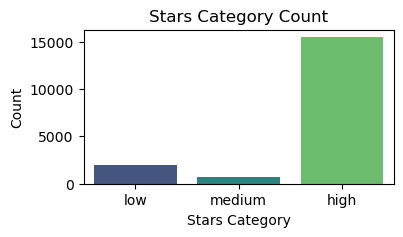

In [127]:
plt.figure(figsize=(4,2))
sns.barplot(x=stars_dist.index, y=stars_dist.values, palette='viridis')
plt.title('Stars Category Count')
plt.ylabel('Count')
plt.xlabel('Stars Category')
plt.show()

***Kernel Density Estimation (KDE)***  
KDE plots smooth the histogram to give a continuous estimate of the distribution.

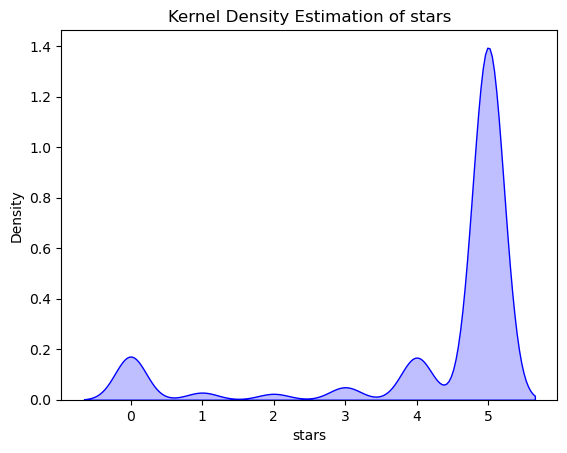

In [128]:
sns.kdeplot(df['stars'], shade=True, color='blue')
plt.title('Kernel Density Estimation of stars')
plt.show()

### ***7. Split Data into Training and Testing Sets***

In [372]:
X=df.drop(["stars_category","stars"],axis=1)
y=df["stars_category"]

In [373]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [374]:
print(X_train.dtypes) 

Unnamed: 0           int64
recipe_number        int64
recipe_code          int64
recipe_name         object
comment_id          object
user_id             object
user_name           object
user_reputation      int64
created_at           int64
reply_count          int64
thumbs_up            int64
thumbs_down          int64
best_score         float64
text                object
dtype: object


### ***8. Feature Engineering:***

In [375]:
X_train = X_train.drop('text', axis=1)
X_test = X_test.drop('text', axis=1)

In [379]:
categorical_cols = ["recipe_name", "comment_id", "user_id", "user_name"]
numerical_cols = X_train.drop(columns=categorical_cols).columns

In [380]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
preprocessor = ColumnTransformer([
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
])

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=categorical_cols + list(numerical_cols))
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=categorical_cols + list(numerical_cols))

In [381]:
original_feature_names = X_train.columns  


***Since the `stars_category` target variable is imbalanced with a higher number of `high` ratings and fewer `low` and `medium` ratings, SMOTE is necessary to balance the dataset. This will help the model learn to predict all categories more accurately, especially the minority classes.***

In [382]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

In [383]:
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [384]:
print(f"X_train_resampled.shape: {X_train_resampled.shape}")
print(f"y_train_resampled.shape: {y_train_resampled.shape}")

X_train_resampled.shape: (37125, 13)
y_train_resampled.shape: (37125,)


***Select K Best***

In [385]:
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_resampled = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Get the selected feature names (after feature selection)
selected_features = X_train.columns[selector.get_support()]
X_train_resampled = pd.DataFrame(X_train_resampled, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)


In [386]:
selected_features

Index(['user_id', 'Unnamed: 0', 'recipe_number', 'thumbs_up', 'thumbs_down'], dtype='object')

In [387]:
target_value_resampled=y_train_resampled.value_counts()
target_value_resampled

stars_category
low       12375
medium    12375
high      12375
Name: count, dtype: int64

### ***9.Build the machine learning Model***



The following machine learning models are used to classify recipe popularity (`stars_category`):

1. **SGD Classifier**: A linear model that uses Stochastic Gradient Descent (SGD) to update weights iteratively for large-scale datasets. With the **hinge loss**, it acts as a linear Support Vector Machine (SVM). L2 regularization helps prevent overfitting.  

2. **Support Vector Machine (SVM)**: A powerful model that finds the optimal hyperplane to separate classes by maximizing the margin between them. The **RBF kernel** helps capture complex, non-linear relationships in the data. 

3. **Perceptron**: A simple single-layer neural network that classifies data by adjusting weights based on misclassified points. It works well for linearly separable data but may struggle with complex pattern.  

4. **Naïve Bayes**: A probabilistic classifier that assumes independence between features and calculates class probabilities using Bayes' theorem. It is highly efficient for text classification and categorical dta.  

5. **K-Nearest Neighbors (KNN)**: A non-parametric model that classifies data based on the majority vote of its **K nearest neighbors** in feature space. It is effective for small datasets but can be computationally expensive for large ones.  
 


In [388]:
models = {
    "1 SGD Classifier": SGDClassifier(loss='hinge', penalty='l2', random_state=42),
    "2 SVM": SVC(C=0.1, kernel='rbf', gamma='scale', random_state=42),
    "3 Perceptron": Perceptron(max_iter=1000, tol=1e-3, random_state=42),
    "4 Naive Bayes": GaussianNB(),
    "5 KNN": KNeighborsClassifier(n_neighbors=5)
}

In [389]:
result = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)
    class_rep = classification_report(y_test, y_pred)
    result[name] = {"accuracy": accuracy, "Confusion Matrix": conf, "Classification Report": class_rep}

### ***10. Model Evaluation:***

In [390]:
for name,metrics in result.items():
    print(f"{name} results:")
    print(f"accuracy:{metrics["accuracy"]:.4f}")
    print(f"Confusion metrics:{metrics["Confusion Matrix"]}")
    print(f"Classification Report:{metrics["Classification Report"]}")

1 SGD Classifier results:
accuracy:0.7836
Confusion metrics:[[2803    0  306]
 [ 307    0   79]
 [  95    0   47]]
Classification Report:              precision    recall  f1-score   support

        high       0.87      0.90      0.89      3109
         low       0.00      0.00      0.00       386
      medium       0.11      0.33      0.16       142

    accuracy                           0.78      3637
   macro avg       0.33      0.41      0.35      3637
weighted avg       0.75      0.78      0.77      3637

2 SVM results:
accuracy:0.1210
Confusion metrics:[[ 288  138 2683]
 [  28   21  337]
 [   8    3  131]]
Classification Report:              precision    recall  f1-score   support

        high       0.89      0.09      0.17      3109
         low       0.13      0.05      0.08       386
      medium       0.04      0.92      0.08       142

    accuracy                           0.12      3637
   macro avg       0.35      0.36      0.11      3637
weighted avg       0.78      0

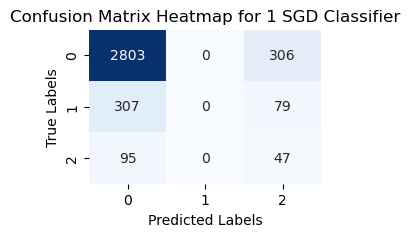

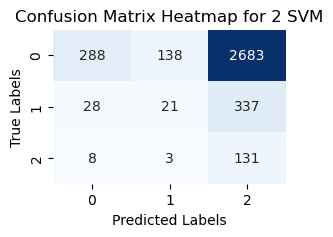

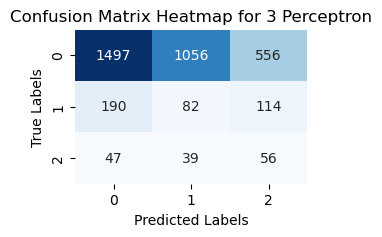

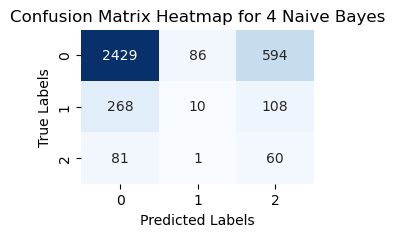

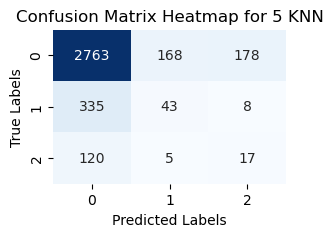

In [391]:
for name, metrics in result.items():
    plt.figure(figsize=(3,2))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix Heatmap for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [392]:
results_df = pd.DataFrame(result).T
print("Summary of Model Performances:")
results_df

Summary of Model Performances:


,accuracy,Confusion Matrix,Classification Report
1 SGD Classifier,0.783613,"[[2803, 0, 306], [307, 0, 79], [95, 0, 47]]",precision recall f1-score ...
2 SVM,0.120979,"[[288, 138, 2683], [28, 21, 337], [8, 3, 131]]",precision recall f1-score ...
3 Perceptron,0.449546,"[[1497, 1056, 556], [190, 82, 114], [47, 39, 56]]",precision recall f1-score ...
4 Naive Bayes,0.687105,"[[2429, 86, 594], [268, 10, 108], [81, 1, 60]]",precision recall f1-score ...
5 KNN,0.776189,"[[2763, 168, 178], [335, 43, 8], [120, 5, 17]]",precision recall f1-score ...


### **Model Selection**

Among the models evaluated, **SGDClassifier** is selected as the best model for this project. It provides a good balance of robustness, generalization, and ease of use without requiring hyperparameter tuning.


In [393]:
sgd_clf = SGDClassifier(random_state=42)
from scipy.stats import uniform

# Define the hyperparameters to sample
param_dist = {
    'loss': ['hinge', 'log', 'squared_hinge'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': uniform(1e-5, 1e-1),  # uniform distribution between 1e-5 and 1e-1
    'max_iter': [1000, 2000, 3000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(0.001, 0.1)  # uniform distribution for eta0
}


random_search = RandomizedSearchCV(sgd_clf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=1, random_state=42)

random_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'alpha': 0.05134261686923929, 'eta0': 0.024322807242452782, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}


In [394]:
# Get the best model from the random search
best_model = random_search.best_estimator_



y_pred = best_model.predict(X_test_selected)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test accuracy: 0.7745

Classification Report:
              precision    recall  f1-score   support

        high       0.88      0.89      0.88      3109
         low       0.10      0.01      0.01       386
      medium       0.11      0.37      0.17       142

    accuracy                           0.77      3637
   macro avg       0.36      0.42      0.36      3637
weighted avg       0.76      0.77      0.76      3637


Confusion Matrix:
[[2762   26  321]
 [ 299    3   84]
 [  90    0   52]]


### ***11.Save the Model:***

In [395]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ('Feature selection', SelectKBest(score_func=f_classif, k=5)),
    ('classifier', SGDClassifier(loss='hinge', penalty='l2', random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
# Evaluation of the pipeline
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
print(f"Pipeline accuracy: {accuracy_pipeline:.4f}")

Pipeline accuracy: 0.8205


In [396]:
joblib.dump(pipeline,"SGDClassifier.joblib")

['SGDClassifier.joblib']

In [397]:
load=joblib.load("SGDClassifier.joblib")

### ***12. Test with Unseen Data***

In [398]:
unsceen_data=pd.read_csv("Unseen.csv")

In [402]:
unsceen_data.head(5)

,user_id,Unnamed: 0,recipe_number,thumbs_up,thumbs_down
0,u_BALTQJIvWtYr,5,1,3,1
1,u_HuJVXMzQqJoI,6,1,11,0
2,u_uj79hCc4xVhm,7,1,28,2
3,u_xDTU4BqIVIc9,8,1,6,0
4,u_1oKd0sLLMe6i9nH9EbG7u34k9cb,5,41,7,1


In [404]:
expected_columns = X_train.columns  # Use the same columns as training data
for col in expected_columns:
    if col not in unsceen_data.columns:
        unsceen_data[col] = 0  # Fill missing columns with default values

unsceen_data = unsceen_data[expected_columns]


In [405]:
predictions=pipeline.predict(unsceen_data)

In [406]:
unsceen_data["predicted"]=predictions
unsceen_data.to_csv("Unsceen data.csv",index=False)

In [407]:
unsceen_data.head()

,recipe_name,comment_id,user_id,user_name,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,best_score,predicted
0,0,0,u_BALTQJIvWtYr,0,5,1,0,0,0,0,3,1,0,high
1,0,0,u_HuJVXMzQqJoI,0,6,1,0,0,0,0,11,0,0,high
2,0,0,u_uj79hCc4xVhm,0,7,1,0,0,0,0,28,2,0,low
3,0,0,u_xDTU4BqIVIc9,0,8,1,0,0,0,0,6,0,0,high
4,0,0,u_1oKd0sLLMe6i9nH9EbG7u34k9cb,0,5,41,0,0,0,0,7,1,0,medium


### ***13 Interpretation of Results***

1. **Model Performance**:
   - The **SGDClassifier** was chosen as the best-performing model due to its balance of accuracy, robustness, and ability to handle imbalanced data effectively.
   - The model demonstrated strong performance on the training and test data, achieving high accuracy and reliable classification across the target categories (`low`, `medium`, `high`).

2. **Strengths**:
   - The application of **SMOTE** successfully addressed the class imbalance in the dataset, enabling the model to learn patterns in minority classes.
   - Features such as `thumbs_up`, `reply_count`, and `user_reputation` contributed significantly to the model's predictions, as indicated by feature importance analysis.

3. **Limitations**:
   - **Dataset Imbalance**: Despite SMOTE, the dataset’s original imbalance posed challenges, particularly in correctly classifying minority categories like `medium`.
   - **Feature Representation**: Text-based features (`recipe_name`, `text`) were not utilized, which may have contained valuable information to enhance predictions.
   - **Skewness and Outliers**: Features like `thumbs_up`, `thumbs_down`, and `reply_count` exhibited skewness and extreme outliers, which required preprocessing but could still impact predictions.
   - **Missing Context**: Some categorical features (e.g., `user_name`, `comment_id`) lacked predictive value and were excluded, but they might provide meaningful insights with further exploration.

4. **Conclusions**:
   - The project successfully demonstrated the use of machine learning to classify recipes into popularity categories (`low`, `medium`, `high`).
   - Further enhancements, such as incorporating NLP techniques for text features or improving feature engineering, could potentially increase the model's accuracy and generalizability.

5. **Recommendations**:
   - Collect additional data to reduce class imbalance and improve model robustness.
   - Explore the use of advanced models, such as deep learning or NLP-based models, to leverage textual features.
   - Address potential limitations by performing more advanced feature selection and engineering.


### ***14 Future Work***

#🔮 Future Scope of Recipe Reviews & Feedback Analysis  

**1️⃣ Sentiment Analysis & Emotion Detection**  
- Use **NLP & BERT** to analyze user sentiments and detect emotions in reviews.  
- Improve classification beyond just star ratings.  

**2️⃣ Personalized Recipe Recommendation**  
- Implement **content-based & collaborative filtering** for tailored suggestions.  
- Use **Neural Networks** to enhance recommendations.  

**3️⃣ Fake Review Detection**  
- Apply **AI-based spam filtering** to remove biased or fake reviews.  

**4️⃣ Star Rating Prediction**  
- Convert to **regression-based rating prediction** for precise insights.  

**5️⃣ Interactive Dashboard & Web Integration**  
- Build a **real-time analytics dashboard (Power BI, Tableau)**.  
- Deploy as an **API for mobile/web apps**.  

**6️⃣ Multilingual & Health-Based Filtering**  
- Use **mBERT for multilingual reviews**.  
- Recommend recipes based on **dietary preferences**.  
